In [ ]:
! git clone https://github.com/YomnaJehad/AI-for-Cyber-Security.git

Cloning into 'AI-for-Cyber-Security'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 15 (delta 1), reused 11 (delta 0), pack-reused 0
Unpacking objects: 100% (15/15), done.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Normalization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier



---
# Working with kaggle 1st dataset
### NOTE: NO LONGER USED
---



In [ ]:
col = range(0,42)
df = pd.read_csv('AI-for-Cyber-Security/kaggle_data/train_dataset.csv', names=col)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
0,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,255,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [ ]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41],
           dtype='int64')

In [ ]:
df.shape

(311028, 42)

In [ ]:
# TRYING TO GUESS THE DATA LABELS
cols= ["duration", "protocoltype", "service", "flag", "srcbytes", "dstbytes", "land", "wrongfragment","urgent", "hot","numfailedlogins", "loggedin", "numcompromised", "rootshell", "suattempted","numroot", "numfilecreations", "numshells","numaccessfiles","dsthostsrvserrorrate", "dsthostrerrorrate", "dsthostsrvrerrorrate", "result","service","count","srvcount","srcbytes","serrorrate","dstbytes","service","srcbytes","dsthostsrvcount","count" ,'duration','service','srcbytes','wrongfragment','count','urgent','numcompromised','srvcount']
len(cols)

41

In [ ]:
df[41].unique(), len(df[41].unique())

(array(['normal.', 'snmpgetattack.', 'named.', 'xlock.', 'smurf.',
        'ipsweep.', 'multihop.', 'xsnoop.', 'sendmail.', 'guess_passwd.',
        'saint.', 'buffer_overflow.', 'portsweep.', 'pod.', 'apache2.',
        'phf.', 'udpstorm.', 'warezmaster.', 'perl.', 'satan.', 'xterm.',
        'mscan.', 'processtable.', 'ps.', 'nmap.', 'rootkit.', 'neptune.',
        'loadmodule.', 'imap.', 'back.', 'httptunnel.', 'worm.',
        'mailbomb.', 'ftp_write.', 'teardrop.', 'land.', 'sqlattack.',
        'snmpguess.'], dtype=object), 38)

[164091  60593  58001   7741   5000   4367   2406   1633   1602   1098
   1053    794    759    736    354    306    158     87     84     22
     18     17     17     16     13     13     12      9      9      4
      3      2      2      2      2      2      2      1]


Text(0.5, 1.0, 'Target variable count')

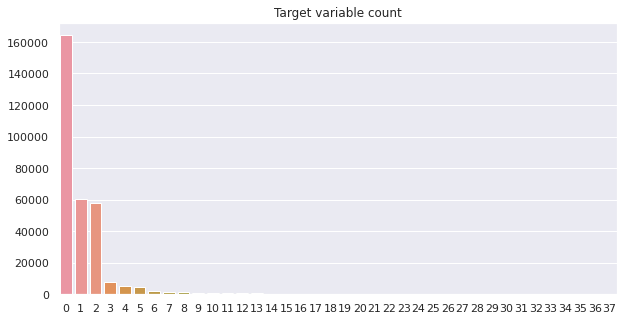

In [ ]:
# check data balance 
z=df[41].value_counts().values
print(z)
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot(x=list(range(38)),y=z)
plt.title('Target variable count')



---
# Working with kaggle 2nd dataset 
[link](https://www.kaggle.com/hamzasamiullah/ml-analysis-application-layer-dos-attack-dataset/data)
---



In [ ]:
import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, recall_score, precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from tensorflow.keras.layers import Normalization
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif


from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

In [ ]:
pip install gdown

In [ ]:
! gdown 'https://drive.google.com/uc?export=download&id=12uX3BW4vFI5rA6ePXpb0c5sOHc3r0ltT'

Downloading...
From: https://drive.google.com/uc?export=download&id=12uX3BW4vFI5rA6ePXpb0c5sOHc3r0ltT
To: /content/test_mosaic.csv
100% 154M/154M [00:00<00:00, 165MB/s]


In [ ]:
mosaic_df = pd.read_csv('test_mosaic.csv')
mosaic_df.shape

(346869, 78)

In [ ]:
mosaic_df.describe()

,Destination_Port,Flow_Duration,Total_Fwd_Packets,Total_Backward_Packets,Total_Length_of_Fwd_Packets,Total_Length_of_Bwd_Packets,Fwd_Packet_Length_Max,Fwd_Packet_Length_Min,Fwd_Packet_Length_Mean,Fwd_Packet_Length_Std,Bwd_Packet_Length_Max,Bwd_Packet_Length_Min,Bwd_Packet_Length_Mean,Bwd_Packet_Length_Std,Flow_Bytes_Sec,Flow_Packets_Sec,Flow_IAT_Mean,Flow_IAT_Std,Flow_IAT_Max,Flow_IAT_Min,Fwd_IAT_Total,Fwd_IAT_Mean,Fwd_IAT_Std,Fwd_IAT_Max,Fwd_IAT_Min,Bwd_IAT_Total,Bwd_IAT_Mean,Bwd_IAT_Std,Bwd_IAT_Max,Bwd_IAT_Min,Fwd_PSH_Flags,Bwd_PSH_Flags,Fwd_URG_Flags,Bwd_URG_Flags,Fwd_Header_Length,Bwd_Header_Length,Fwd_Packets_Sec,Bwd_Packets_Sec,Min_Packet_Length,Max_Packet_Length,Packet_Length_Mean,Packet_Length_Std,Packet_Length_Variance,FIN_Flag_Count,SYN_Flag_Count,RST_Flag_Count,PSH_Flag_Count,ACK_Flag_Count,URG_Flag_Count,CWE_Flag_Count,ECE_Flag_Count,Down_Up_Ratio,Average_Packet_Size,Avg_Fwd_Segment_Size,Avg_Bwd_Segment_Size,Fwd_Avg_Bytes_Bulk,Fwd_Avg_Packets_Bulk,Fwd_Avg_Bulk_Rate,Bwd_Avg_Bytes_Bulk,Bwd_Avg_Packets_Bulk,Bwd_Avg_Bulk_Rate,Subflow_Fwd_Packets,Subflow_Fwd_Bytes,Subflow_Bwd_Packets,Subflow_Bwd_Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,346869.000000,3.468690e+05,346869.000000,346869.000000,3.468690e+05,3.468690e+05,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,346869.000000,346869.000000,346869.0,346869.0,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,346869.000000,346869.000000,346869.000000,346869.000000,3.468690e+05,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.0,346869.000000,346869.000000,346869.000000,346869.000000,346869.000000,346869.0,346869.0,346869.0,346869.0,346869.0,346869.0,346869.000000,3.468690e+05,346869.000000,3.468690e+05,346869.000000,346869.000000,346869.000000,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05,3.468690e+05
mean,4961.060302,2.504744e+07,10.393200,6.990642,4.817145e+02,1.091510e+04,229.852748,9.329130,48.988312,81.890953,187.463933,23.249953,76.126182,60.483213,62745.660062,6.977515e+04,2.614975e+06,5.378531e+06,1.629339e+07,1.821145e+05,2.383660e+07,3.187315e+06,5.042977e+06,1.541599e+07,7.246120e+05,4.183552e+06,8.235885e+05,3.683114e+05,1.529836e+06,5.612366e+05,0.029466,0.002148,0.0,0.0,-9.619232e+03,-8.011117e+02,2.914203e+04,3.949966e+03,9.020048,348.334296,67.406455,112.033202,3.990950e+04,0.014438,0.460070,0.097579,0.116779,0.153533,0.055321,0.0,0.000058,0.313283,76.220639,48.988312,76.126182,0.0,0.0,0.0,0.0,0.0,0.0,10.393200,4.817145e+02,6.990642,1.091510e+04,4164.992161,13995.246004,5.520439,-1.438942e+03,3.115393e+05,1.746683e+05,4.663413e+05,1.892722e+05,1.369283e+07,2.458864e+06,1.581106e+07,1.173857e+07
std,15466.251164,3.554961e+07,727.578058,946.725060,5.105668e+03,2.187483e+06,327.231093,27.410889,68.262524,109.894059,571.317278,57.425897,205.471721,198.496265,96817.849418,9.712914e+04,5.075934e+06,8.814368e+06,2.615730e+07,3.122359e+06,3.499114e+07,7.885718e+06,8.371675e+06,2.551158e+07,7.011475e+06,1.930433e+07,6.583466e+06,2.456479e+06,8.831968e+06,6.370463e+06,0.169110,0.046294,0.0,0.0,3.722322e+06,3.493950e+05,1.600950e+05,3.427407e+04,19.777663,590.217597,115.014874,165.402949,1.541195e+05,0.119287,0.498404,0.296744,0.321157,0.360501,0.228605,0.0,0.007593,0.521901,120.645178,68.262524,205.471721,0.0,0.0,0.0,0.0,0.0,0.0,727.578058,5.105668e+03,946.725060,2.187483e+06,13096.453252,14942.957908,686.392521,3.488797e+05,8.809394e+05,6.078540e+05,1.271205e+06,7.446716e+05,2.426684e+07,7.063630e+06,2.623197e+07,2.356036e+07
min,0.000000,-1.000000e+00,1.000000,0.

In [ ]:
mosaic_df.info()

In [ ]:
mosaic_df['Label'].value_counts()

BENIGN           159295
DoS Hulk         132394
DoS slowloris     55180
Name: Label, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Target variable count')

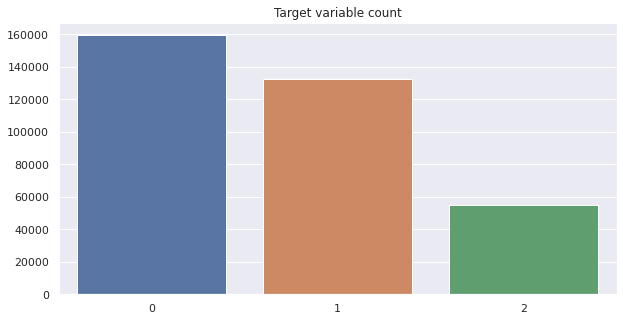

In [ ]:
x = mosaic_df['Label'].value_counts().values
sns.set(rc={'figure.figsize':(10,5)})
sns.barplot([0,1,2],x)
plt.title('Target variable count')

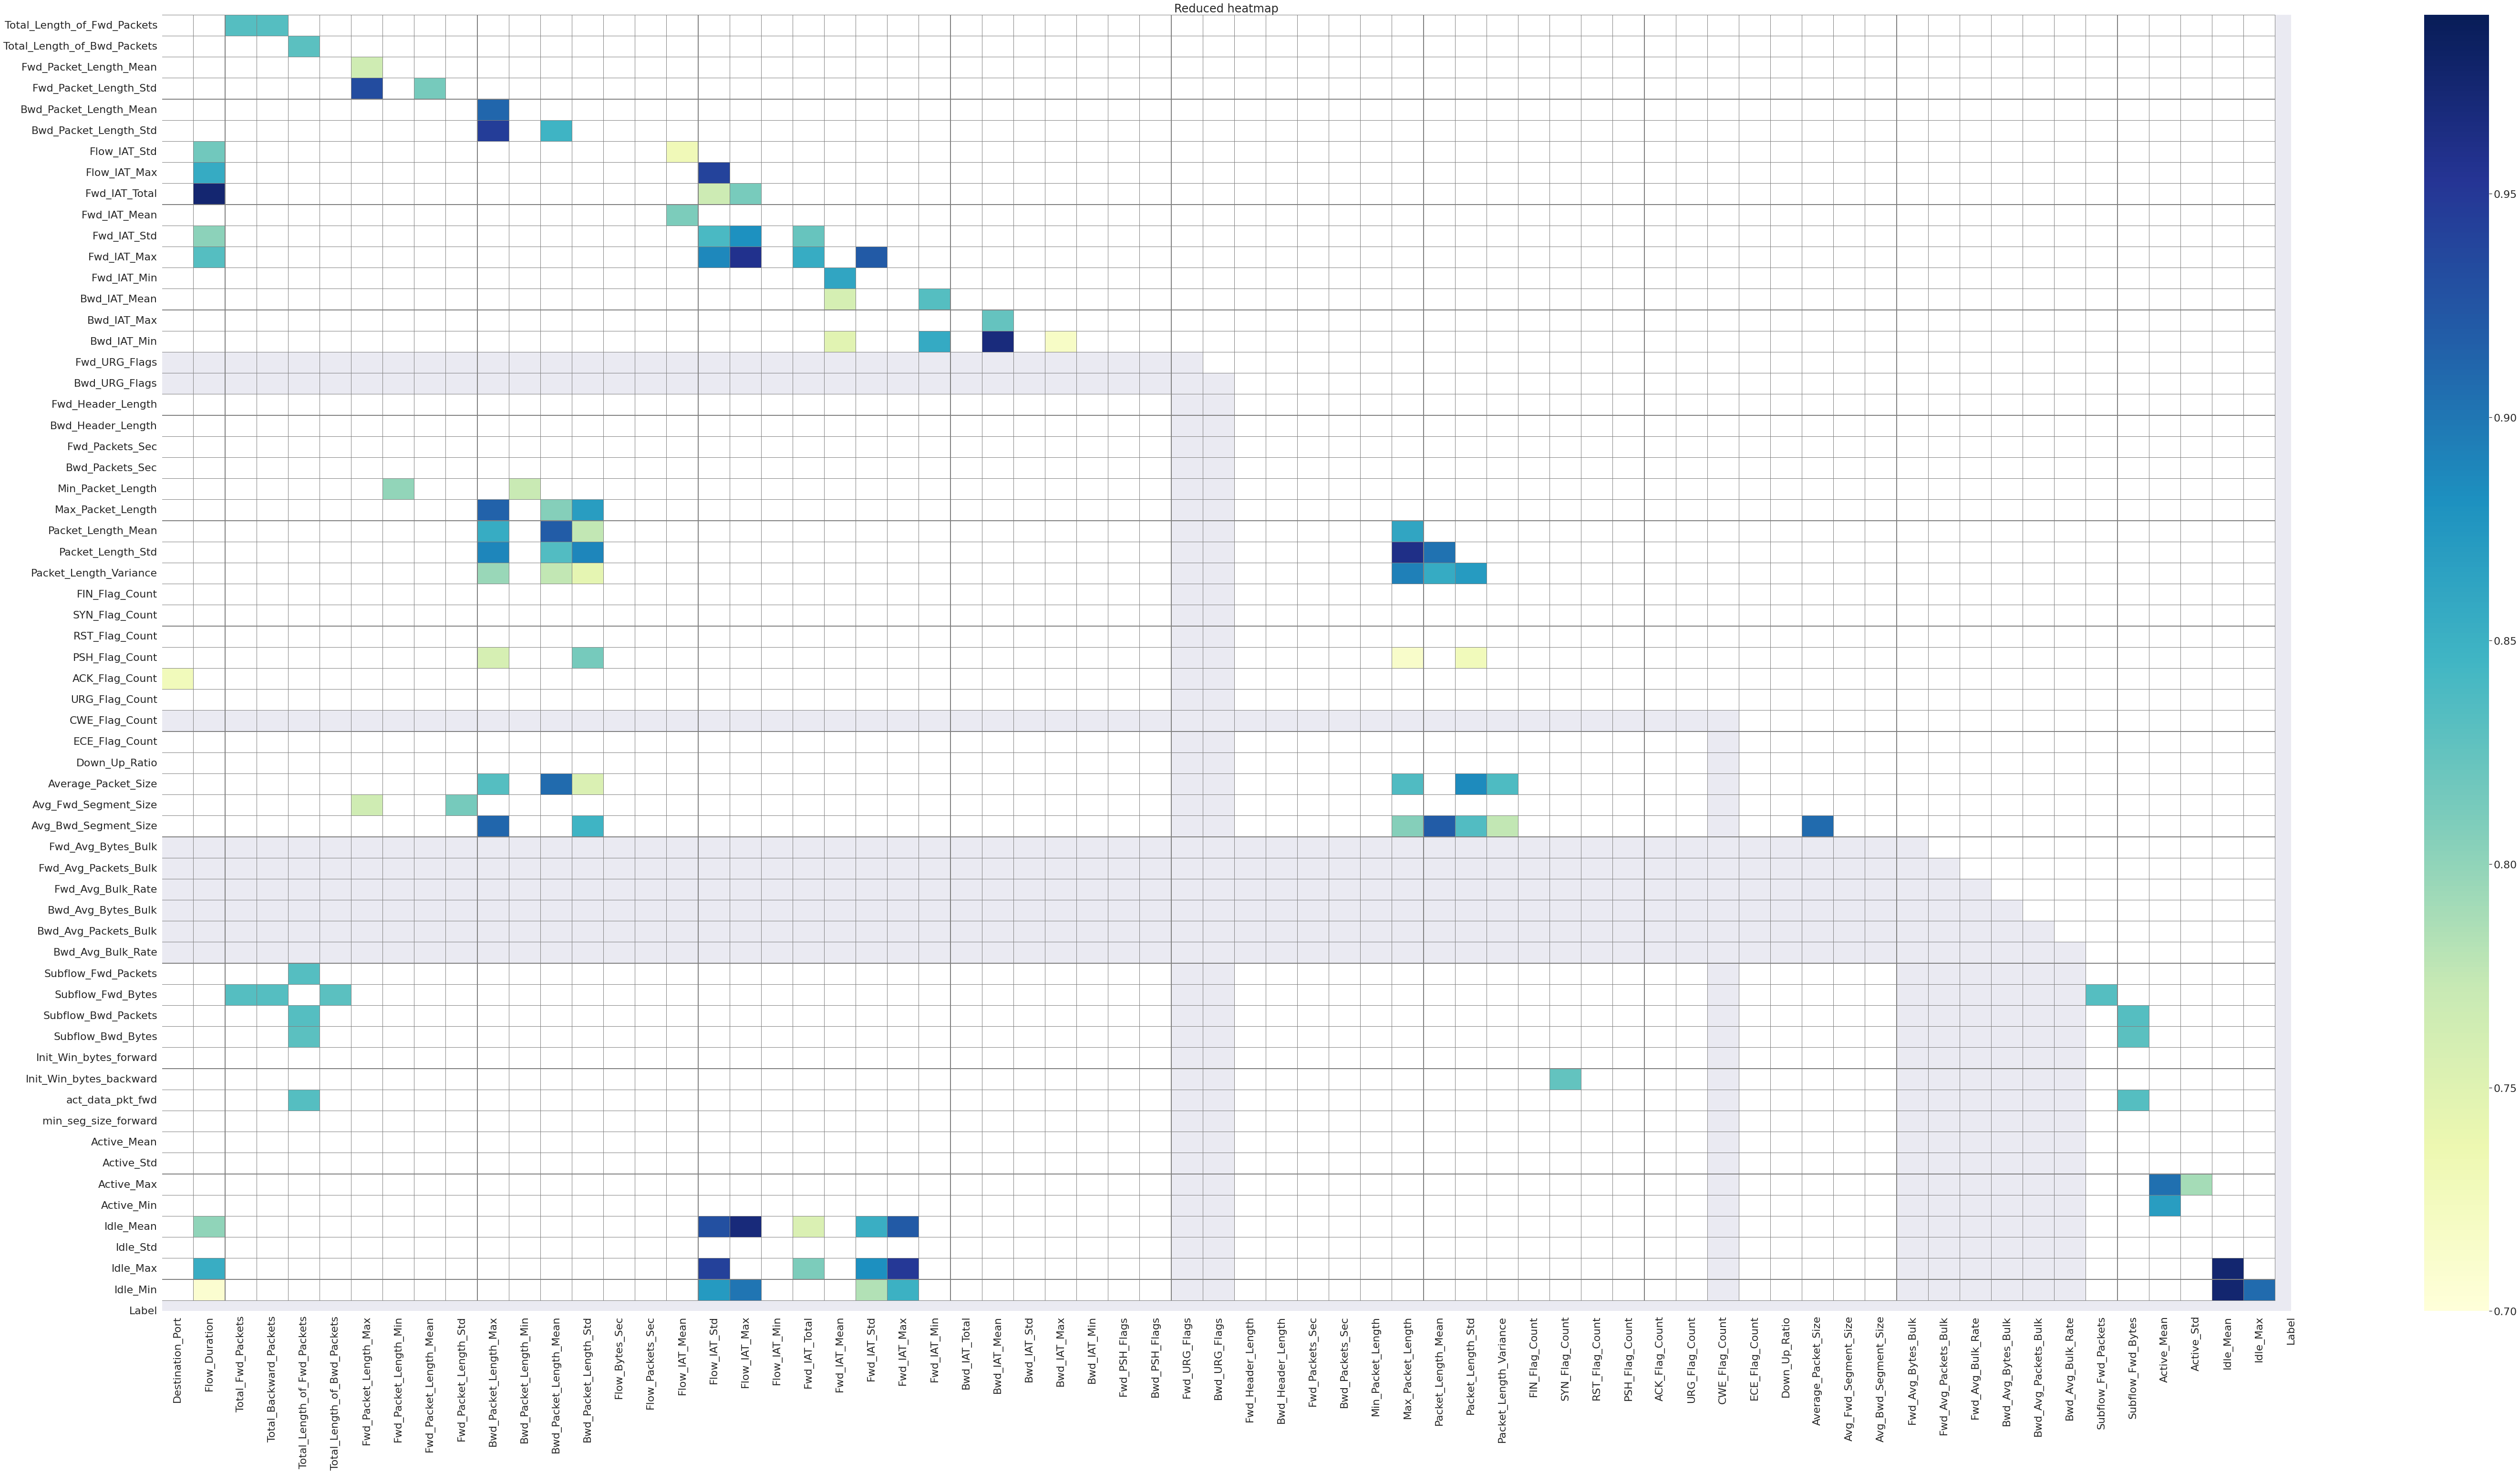

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from copy import copy


labels = list(mosaic_df.columns)
corr = mosaic_df.corr()

#conditions for filtering 0.6<=r<=0.9
val_min = 0.7
val_max = 0.99

#plotting starts here
sns.set(font_scale=2)

#define the colormap with clipping values
my_cmap = copy(plt.cm.YlGnBu)
my_cmap.set_over("white")
my_cmap.set_under("white")

corr = np.tril(corr)

#delete columns where all elements do not fulfill the conditions
ind_x,  = np.where(np.all(np.logical_or(corr<val_min, corr>val_max), axis=0))
corr = np.delete(corr, ind_x, 1)
#update x labels
map_labels_x = [item for i, item in enumerate(labels) if i not in ind_x]
    
#now the same for rows 
ind_y, = np.where(np.all(np.logical_or(corr<val_min, corr>val_max), axis=1))
corr = np.delete(corr, ind_y, 0)
#update y labels
map_labels_y = [item for i, item in enumerate(labels) if i not in ind_y]

#plot heatmap
g2 = sns.heatmap(corr,
    xticklabels=map_labels_x,
    yticklabels=map_labels_y,
    vmin=val_min,
    vmax=val_max,
    cmap=my_cmap,
    linewidths=0.2,
    linecolor="grey"
     
                ) #, ax=ax2)

g2.set_title("Reduced heatmap")
sns.set(rc={'figure.figsize':(100,50)})
plt.show()

# columns to remove based on this visualizations
# 'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Std', 'Flow_IAT_Max',
# 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std'

# 'Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets','Total_Backward_Packets', 'Total_Length_of_Fwd_Packets','Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
# 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean','Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max','Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean','Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
# 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min','Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max','Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
# 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',

#'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length','Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',  <--- KEPT

# 'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean','Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count','SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',

# 'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down_Up_Ratio', 'Init_Win_bytes_forward', <--- KEPT

#'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
# 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate',  <--- KEPT
#'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets','Subflow_Bwd_Bytes',
# 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 

# 'min_seg_size_forward','Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Std',  <--- KEPT
# 'Idle_Mean', 'Idle_Max', 'Idle_Min'

In [ ]:
# 'Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Std', 'Flow_IAT_Max',
# 'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std'

# 'Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets','Total_Backward_Packets', 'Total_Length_of_Fwd_Packets','Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
# 'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean','Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max','Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean','Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
# 'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min','Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max','Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
# 'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',

#'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length','Bwd_Header_Length', 'Fwd_Packets_Sec', 'Bwd_Packets_Sec',  <--- KEPT

# 'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean','Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count','SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',

# 'URG_Flag_Count', 'CWE_Flag_Count', 'ECE_Flag_Count', 'Down_Up_Ratio', 'Init_Win_bytes_forward', <--- KEPT

# 'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
# 'Fwd_Avg_Bytes_Bulk', 'Fwd_Avg_Packets_Bulk', 'Fwd_Avg_Bulk_Rate', 'Bwd_Avg_Bytes_Bulk', 'Bwd_Avg_Packets_Bulk', 'Bwd_Avg_Bulk_Rate',  <--- KEPT
# 'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets','Subflow_Bwd_Bytes',
# 'Init_Win_bytes_backward', 'act_data_pkt_fwd', 

# 'min_seg_size_forward','Active_Mean', 'Active_Std', 'Active_Max', 'Active_Min', 'Idle_Std',  <--- KEPT
# 'Idle_Mean', 'Idle_Max', 'Idle_Min'
mosaic_df_selected = mosaic_df.drop(['Total_Length_of_Fwd_Packets', 'Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Mean', 'Bwd_Packet_Length_Mean', 'Bwd_Packet_Length_Std', 'Flow_IAT_Std', 'Flow_IAT_Max',
                                     'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std',
                                     'Destination_Port', 'Flow_Duration', 'Total_Fwd_Packets','Total_Backward_Packets', 'Total_Length_of_Fwd_Packets','Total_Length_of_Bwd_Packets', 'Fwd_Packet_Length_Max',
                                     'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean','Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max','Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean','Bwd_Packet_Length_Std', 'Flow_Bytes_Sec', 'Flow_Packets_Sec',
                                     'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min','Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max','Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
                                     'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
                                     'Min_Packet_Length', 'Max_Packet_Length', 'Packet_Length_Mean','Packet_Length_Std', 'Packet_Length_Variance', 'FIN_Flag_Count','SYN_Flag_Count', 'RST_Flag_Count', 'PSH_Flag_Count', 'ACK_Flag_Count',
                                     'Average_Packet_Size', 'Avg_Fwd_Segment_Size', 'Avg_Bwd_Segment_Size',
                                     'Subflow_Fwd_Packets', 'Subflow_Fwd_Bytes', 'Subflow_Bwd_Packets','Subflow_Bwd_Bytes', 'Init_Win_bytes_backward', 'act_data_pkt_fwd',  'Idle_Mean', 'Idle_Max', 'Idle_Min'], axis=1)

In [ ]:
mosaic_df_selected.shape

(346869, 24)

In [ ]:
scaler = RobustScaler()
X_selected_scaled = pd.DataFrame(scaler.fit_transform(mosaic_df_selected.drop(['Label'], axis=1)))
y = mosaic_df_selected['Label']

In [ ]:
smote = SMOTE()
X_sm, y_sm = smote.fit_resample(X_selected_scaled, y)

In [ ]:
X_sm.shape , y_sm.shape

((477885, 23), (477885,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3,random_state=0, shuffle=True)

In [ ]:
svm_clf = svm.SVC(probability=True).fit(X_train, y_train)
dt_clf = DecisionTreeClassifier(max_depth=4, max_leaf_nodes=4).fit(X_sm,y_sm)

In [ ]:
# print("Train Accuracy: ", svm_clf.score(X_train, y_train) )
# y_pred = svm_clf.predict(X_test)
# print(classification_report(y_test, y_pred))
print(50*'_')
print("Train Accuracy: ", dt_clf.score(X_train, y_train) )
y_pred = dt_clf.predict(X_test)
print(classification_report(y_test, y_pred))

__________________________________________________
Train Accuracy:  0.9601547296267178
               precision    recall  f1-score   support

       BENIGN       1.00      1.00      1.00     47714
     DoS Hulk       0.92      0.97      0.94     47811
DoS slowloris       0.97      0.91      0.94     47841

     accuracy                           0.96    143366
    macro avg       0.96      0.96      0.96    143366
 weighted avg       0.96      0.96      0.96    143366





---

# Working with collected dataset
[link](https://www.unb.ca/cic/datasets/ddos-2019.html)

---



In [ ]:
df = pd.read_csv('AI-for-Cyber-Security/Collected_dataset/collected.csv')
df.shape

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(50000, 88)

# **Preprocessing**

In [ ]:
#Removing spaces from begining of columns names
def rem_spaces(data):
  cols = []
  for col in data.columns:
    cols.append(col.strip()) 
  data.columns = cols
  return data
df = rem_spaces(df)

y = df['Label']
X = df.drop(columns = 'Label')
X

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound
0,425,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.502024e+06,3.413690e+03,295.989583,500.959301,3596.0,1.0,28415.0,295.989583,500.959301,3596.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,444.536082,440.0,0.0,-97,0,0,0,0,0,0,97,42680,0,0,-1,-1,96,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
1,430,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,4.400000e+08,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,660.000000,440.0,0.0,-2,0,0,0,0,0,0,2,880,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,1654,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.812602e+06,4.119549e+03,243.964824,578.101371,5418.0,1.0,48549.0,243.964824,578.101371,5418.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
3,2927,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.820552e+06,4.137617e+03,242.899497,485.292695,3337.0,1.0,48337.0,242.899497,485.292695,3337.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
4,694,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,2.747767e+06,6.244926e+03,160.934673,196.891271,1236.0,0.0,32026.0,160.934673,196.891271,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,...,440.0,0.0,0.0,0,0,0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,0,0,0,0,0,0,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,6619,172.16.0.5-192.168.50.1-900-64792-17,172.16.0.5,900,192.168.50.1,64792,17,2018-12-01 11:32:35.878763,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0

In [ ]:
y.value_counts

In [ ]:
#drop columns which contains only 1 value for all records (0)
for i in X.columns:
  if len(X[i].unique()) == 1:
    X = X.drop(i, axis =1)


#Drop other unimportant columns
X = X.drop('Unnamed: 0',axis=1)
X = X.drop("Flow ID",axis=1)
X = X.drop("Timestamp",axis=1)
X = X.drop("SimillarHTTP",axis=1)
X = X.drop("Protocol",axis=1)

In [ ]:
#label encoding categorical features
cols = X.columns
num_cols = X._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))

le = LabelEncoder()
for i in cat_cols:
  X[i] = le.fit_transform(X[i])
X

,Source IP,Source Port,Destination IP,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,20,634,125,60495,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.502024e+06,3.413690e+03,295.989583,500.959301,3596.0,1.0,28415.0,295.989583,500.959301,3596.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-97,0,3.413690e+03,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,444.536082,440.0,0.0,-97,97,42680,0,0,-1,-1,96,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,108,634,26,60495,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,4.400000e+08,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,-2,0,1.000000e+06,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,660.000000,440.0,0.0,-2,2,880,0,0,-1,-1,1,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,20,634,125,46391,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.812602e+06,4.119549e+03,243.964824,578.101371,5418.0,1.0,48549.0,243.964824,578.101371,5418.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-200,0,4.119549e+03,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,20,634,125,11894,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,1.820552e+06,4.137617e+03,242.899497,485.292695,3337.0,1.0,48337.0,242.899497,485.292695,3337.0,1.0,0.0,0.0,0.0,0.0,0.0,0,-200,0,4.137617e+03,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,20,634,125,27878,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,0.0,0.0,0.0,0.0,2.747767e+06,6.244926e+03,160.934673,196.891271,1236.0,0.0,32026.0,160.934673,196.891271,1236.0,0.0,0.0,0.0,0.0,0.0,0.0,0,-200,0,6.244926e+03,0.0,440.0,440.0,440.0,0.0,0.0,0,0,0,0,0,0.0,442.200000,440.0,0.0,-200,200,88000,0,0,-1,-1,199,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,20,900,125,64792,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,28,0,1.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0.0,2208.000000,1472.0,0.0,28,2,2944,0,0,-1,-1,1,14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49996,20,927,125,54603,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,0.0,0.0,0.0,0.0,1.472000e+09,1.000000e+06,2.000000,0.000000,2.0,2.0,2.0,2.000000,0.000000,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,2810,0,1.000000e+06,0.0,1472.0,1472.0,1472.0,0.0,0.0,0,0,0,0,0,0.0,2208.000000,1472.0,0.0,2810,2,2944,0,0,-1,-1,1,1405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
49997,20,928,125,16910,1,2,0,2896.0,0.0,1448.0,1448.0,1448.0,0.0,0.0,0.0,0.0,0.0,2.896000e+09,2.000000e+06,1.000000,0.000000,1.0,1.0,1.0,1.000000,0.000000,1.0,1.0,0.0,0.0

In [ ]:
#Remove infinity and na values from the dataset
def rem_inf_na(data):
  data = data.replace([np.inf, -np.inf], np.nan)        #Replace inf with na
  data = data.fillna(data.mean())                       #Replace na with mean
  return data

X = rem_inf_na(X)

#Standard Scaling
def scale(data):
  scaler = StandardScaler()
  data_scaled = scaler.fit_transform(data)
  data = pd.DataFrame(data_scaled, columns= data.columns)
  return data

X = scale(X)
X

,Source IP,Source Port,Destination IP,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,SYN Flag Count,RST Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,-0.456509,-0.784081,-0.205135,1.499739,-0.150580,0.138881,-0.071804,1.096171,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.838716,-0.948575,-0.105535,-0.146542,-0.144646,-0.022041,-0.144756,-0.117853,-0.137113,-0.136952,-0.021012,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,-0.930234,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.729542,-0.549417,-0.179663,0.12304,0.138881,1.096171,-0.071804,-0.028552,-0.222624,-0.153103,1.108217,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,0.450483
1,1.592532,-0.784081,-2.371450,1.499739,-0.152615,-0.060861,-0.071804,-0.422212,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.480044,0.158046,-0.105905,-0.146890,-0.145210,-0.022040,-0.146798,-0.118154,-0.137385,-0.137518,-0.021010,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,0.170716,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.500765,-0.549417,-0.179663,0.12304,-0.060861,-0.422212,-0.071804,-0.028552,-0.222624,-0.153103,-0.396257,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,-2.219838
2,-0.456509,-0.784081,-0.205135,0.844939,-0.149139,0.355444,-0.071804,2.742417,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.838462,-0.947791,-0.105601,-0.146488,-0.144361,-0.022041,-0.143309,-0.117906,-0.137072,-0.136665,-0.021012,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,-0.929454,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.732022,-0.549417,-0.179663,0.12304,0.355444,2.742417,-0.071804,-0.028552,-0.222624,-0.153103,2.739383,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,0.450483
3,-0.456509,-0.784081,-0.205135,-0.756639,-0.149154,0.355444,-0.071804,2.742417,-0.028552,-0.598977,-0.509677,-0.549417,-0.226967,-0.107821,-0.2187,-0.179663,-0.148277,-0.838456,-0.947771,-0.105602,-0.146553,-0.144687,-0.022041,-0.143324,-0.117907,-0.137122,-0.136993,-0.021012,-0.133229,-0.114116,-0.1217,-0.122728,-0.171356,-0.144019,0.12304,0.004467,-0.929434,-0.048296,-0.509265,-0.428187,-0.567426,-0.188949,-0.044913,-0.031639,-0.144019,-0.231293,-0.334924,-0.279417,-0.364517,-0.732022,-0.549417,-0.179663,0.12304,0.355444,2.742417,-0.071804,-0.028552,-0.222624,-0.153103,2.739383,0.216009,-0.061442,-0.037857,-0.055629,-0.05339,-0.120419,-0.045203,-0.121385,-0.116794,0.450483
4,-0.456509,-0.784081,-0.205135,-0.014557,-0.150322,0.355444,-0.071804,2.742417,-0.028552,-0.598977,-0.509677,-0.

In [ ]:
#Feauture selection 

bestfeatures = SelectKBest(score_func=mutual_info_classif, k=20)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(k,'Score'))  #print 10 best features

X_filtered = pd.DataFrame(X, columns = featureScores.nlargest(20,'Score')["Specs"])
#X= X_filtered
X_filtered

Specs,Source Port,Max Packet Length,Average Packet Size,Fwd Packet Length Mean,Avg Fwd Segment Size,Total Length of Fwd Packets,Subflow Fwd Bytes,Packet Length Mean,Fwd Packet Length Min,Min Packet Length,Fwd Packet Length Max,Flow Bytes/s,Flow Packets/s,Flow IAT Max,Fwd Packets/s,Flow IAT Mean,Flow Duration,Fwd Header Length,Fwd Header Length.1,Fwd IAT Max
0,-0.784081,-0.428187,-0.729542,-0.549417,-0.549417,1.096171,1.096171,-0.567426,-0.509677,-0.509265,-0.598977,-0.838716,-0.948575,-0.144646,-0.930234,-0.105535,-0.150580,0.12304,0.12304,-0.136952
1,-0.784081,-0.428187,-0.500765,-0.549417,-0.549417,-0.422212,-0.422212,-0.567426,-0.509677,-0.509265,-0.598977,-0.480044,0.158046,-0.145210,0.170716,-0.105905,-0.152615,0.12304,0.12304,-0.137518
2,-0.784081,-0.428187,-0.732022,-0.549417,-0.549417,2.742417,2.742417,-0.567426,-0.509677,-0.509265,-0.598977,-0.838462,-0.947791,-0.144361,-0.929454,-0.105601,-0.149139,0.12304,0.12304,-0.136665
3,-0.784081,-0.428187,-0.732022,-0.549417,-0.549417,2.742417,2.742417,-0.567426,-0.509677,-0.509265,-0.598977,-0.838456,-0.947771,-0.144687,-0.929434,-0.105602,-0.149154,0.12304,0.12304,-0.136993
4,-0.784081,-0.428187,-0.732022,-0.549417,-0.549417,2.742417,2.742417,-0.567426,-0.509677,-0.509265,-0.598977,-0.837697,-0.945431,-0.145017,-0.927106,-0.105705,-0.150322,0.12304,0.12304,-0.137324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,-0.773475,0.597309,1.142877,1.131599,1.131599,-0.347237,-0.347237,1.123733,1.133656,1.133825,1.086643,0.364086,0.158046,-0.145210,0.170716,-0.105905,-0.152615,0.12304,0.12304,-0.137518
49996,-0.772399,0.597309,1.142877,1.131599,1.131599,-0.347237,-0.347237,1.123733,1.133656,1.133825,1.086643,0.364086,0.158046,-0.145210,0.170716,-0.105905,-0.152615,0.12304,0.12304,-0.137518
49997,-0.772359,0.573460,1.104653,1.092506,1.092506,-0.348981,-0.348981,1.084403,1.095439,1.095614,1.047442,1.528855,1.268457,-0.145210,1.275436,-0.105906,-0.152615,0.12304,0.12304,-0.137519
49998,-0.772319,0.597309,1.142877,1.131599,1.131599,-0.347237,-0.347237,1.123733,1.133656,1.133825,1.086643,1.568116,1.268457,-0.145210,1.275436,-0.105906,-0.152615,0.12304,0.12304,-0.137519


# **Model**

In [ ]:
#split into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.33, random_state=42)

In [ ]:
#SVM
clf_svc = SVC(probability=True)
clf_svc.fit(X_train, y_train)
pred_svc = clf_svc.predict(X_test)
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

      BENIGN       0.83      0.99      0.90      2913
   DrDoS_DNS       0.99      0.87      0.93      3082
  DrDoS_LDAP       0.50      0.63      0.56      3289
 DrDoS_MSSQL       0.47      0.37      0.41      3285
   DrDoS_NTP       0.71      0.26      0.38       686
   DrDoS_UDP       0.99      1.00      1.00      3245

    accuracy                           0.74     16500
   macro avg       0.75      0.69      0.70     16500
weighted avg       0.75      0.74      0.74     16500



In [ ]:
#Decision Tree
clf_tree = DecisionTreeClassifier()
clf_tree.fit(X_train, y_train)
pred_tree = clf_tree.predict(X_test)
print(classification_report(y_test, pred_tree))

              precision    recall  f1-score   support

      BENIGN       0.98      0.99      0.99      2913
   DrDoS_DNS       0.98      0.97      0.98      3082
  DrDoS_LDAP       0.79      0.91      0.85      3289
 DrDoS_MSSQL       0.89      0.76      0.82      3285
   DrDoS_NTP       0.85      0.87      0.86       686
   DrDoS_UDP       1.00      1.00      1.00      3245

    accuracy                           0.92     16500
   macro avg       0.92      0.92      0.91     16500
weighted avg       0.92      0.92      0.92     16500



In [ ]:
#ensemble
ens = VotingClassifier(estimators=[('svm', clf_svc), ('tree', clf_tree)], voting='soft')
ens.fit(X_train, y_train)
pred_ens = ens.predict(X_test)
print(classification_report(y_test, pred_ens))

              precision    recall  f1-score   support

      BENIGN       0.98      0.99      0.99      2913
   DrDoS_DNS       0.98      0.97      0.98      3082
  DrDoS_LDAP       0.80      0.91      0.85      3289
 DrDoS_MSSQL       0.89      0.77      0.82      3285
   DrDoS_NTP       0.86      0.86      0.86       686
   DrDoS_UDP       1.00      1.00      1.00      3245

    accuracy                           0.92     16500
   macro avg       0.92      0.91      0.92     16500
weighted avg       0.92      0.92      0.92     16500

